In [1]:
# all imports
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# all functions

def get_values(m: int, c:int, length:int):
    xs = np.arange(0, length, 1, dtype=int)
    ys = xs*m + c
    return (xs, ys)

def plot_scatter(xs, ys, title:str, line_name:str):
    # Plotting the data as a scatter plot
    plt.figure(figsize=(10, 6))
    plt.scatter(xs, ys, label=line_name, color='b', s=10)  # 's' controls the size of the points
    plt.title(title)
    plt.xlabel('xs')
    plt.ylabel('ys')
    plt.legend()
    plt.grid(True)
    plt.show()

def calculate_estimates(xs, m, c):
    return xs * m + np.ones(len(xs)) * c

def calculate_mse(actual_ys, estimate_ys):
    total_error = 0.0
    for actual_y, estimate_y in zip(actual_ys, estimate_ys):
        total_error += (estimate_y - actual_y) ** 2
    return total_error / len(actual_ys)

def plot_base(xs, actual_ys, estimate_ys, title, show_plot=True):
    plt.figure(figsize=(10, 6))
    plt.scatter(xs, actual_ys, label="Actual Data Points", color='b', s=10)
    plt.plot(xs, estimate_ys, label="Current Estimate Line", color='r')
    plt.title(title)
    plt.xlabel('xs')
    plt.ylabel('ys')
    plt.legend()
    plt.grid(True)
    
    if show_plot:
        plt.show()
    else:
        return plt

def plot_estimates(xs, actual_ys, m, c, show_plot=True):
    estimate_ys = calculate_estimates(xs, m, c)
    return plot_base(xs, actual_ys, estimate_ys, "Actual Line vs. Current Fit", show_plot)

def plot_estimates_with_residuals(xs, actual_ys, m, c, show_plot=True):
    estimate_ys = calculate_estimates(xs, m, c)
    plt = plot_base(xs, actual_ys, estimate_ys, "Actual Line vs. Current Fit with Residuals", False)
    
    for x, actual_y, estimate_y in zip(xs, actual_ys, estimate_ys):
        plt.plot([x, x], [actual_y, estimate_y], color='g')
        plt.text(x, (actual_y + estimate_y) / 2, f"{actual_y - estimate_y:.2f}", 
                 color='black', fontsize=8, ha='left', va='bottom')
    
    if show_plot:
        plt.show()
    else:
        return plt

def plot_estimates_with_mse(xs, actual_ys, m, c):
    estimate_ys = calculate_estimates(xs, m, c)
    mse = calculate_mse(actual_ys, estimate_ys)
    
    # Use the existing function to plot estimates with residuals
    plt = plot_estimates_with_residuals(xs, actual_ys, m, c, show_plot=False)
    
    # Add the MSE below the plot
    plt.figtext(0.5, -0.05, f"MSE: {mse:.2f}", 
                ha='center', fontsize=12, color='red')
    
    # Show the final plot
    plt.show()


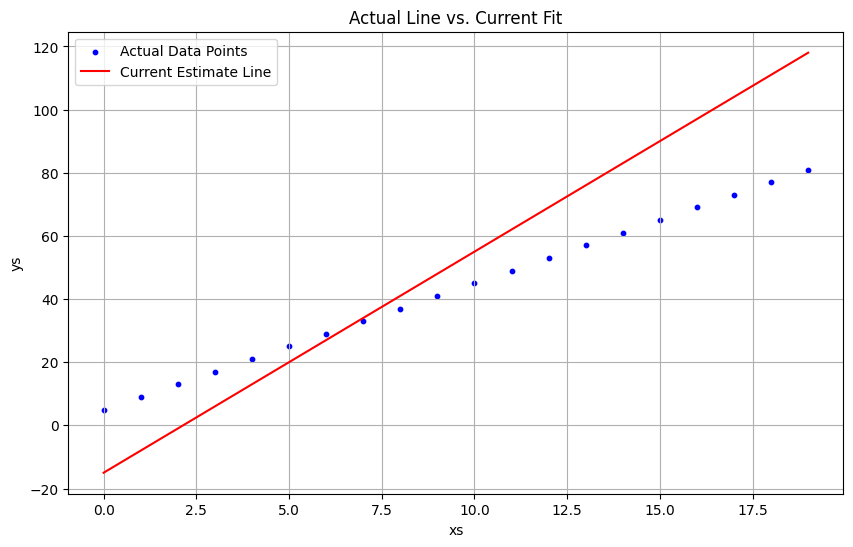

In [9]:
m = 4  # slope of the line
c = 5  # y-intercept

# Generate data points
xs, ys = get_values(m, c, 20)  # Generate 20 data points with xs from 0 to 19

# Plot the estimates with an arbitrary initial slope and intercept
plot_estimates(xs, ys, 7, -15)


# Find the correct gradient and intercept

We want to get a way to find the correct gradient for our linear regression. But to do that, how do we know if we're doing it right or wrong? Intuitively, we just eyeball the distance from our line to the actual data points. However, we need a more precise method to quantify this.

## Squared Error

One way to measure the accuracy of our line is by calculating the **squared error** for each data point. The squared error is the square of the difference between the actual value and the estimated value:

$$
\text{Squared Error} = (y_{\text{actual}, i} - y_{\text{estimate}, i})^2
$$

### Why Do We Square the Errors?

We square the errors for a few key reasons. It makes all errors positive, so big mistakes in different directions don't cancel out when added up. Squaring also makes bigger errors count much more than smaller ones, helping our model notice points that are far from our line. This approach creates a calculation that's easier to work with mathematically for derivatives. 

## Mean Squared Error (MSE)

To evaluate the overall fit of our line across all data points, we calculate the **Mean Squared Error (MSE)**, which is the average of these squared errors. The MSE provides a single value that summarizes how well the line fits the data. The formula for MSE is:

$$
\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_{\text{actual}, i} - y_{\text{estimate}, i})^2
$$

where:

\begin{aligned}
&n \text{ is the number of data points,} \\
&y_{\text{actual}, i} \text{ is the actual value of the } i\text{-th data point,} \\
&y_{\text{estimate}, i} \text{ is the estimated value of the } i\text{-th data point using the current line.}
\end{aligned}

By minimizing the MSE, we can find the gradient and intercept that produce the best-fitting line.


In [ ]:
plot_estimates_with_mse(xs, ys, 10, 2)


In [ ]:
plot_estimates_with_mse(xs, ys, 1, 2)


In [ ]:
plot_estimates_with_mse(xs, ys, 5, 5)

In [ ]:
plot_estimates_with_mse(xs, ys, 4, 2)

In [ ]:
plot_estimates_with_mse(xs, ys, 4, 3)

In [ ]:
plot_estimates_with_mse(xs, ys, 4, 5)

# How do we automate this?
Obviously, we can't do this by hand every single time. That was just a demo. We can program a function to look at the MSE and the current gradient, decide how to change those, and then change them. This process is called **backpropagation**. 


#### Step 1: Start with a Guess
First, we start with an initial guess for our parameters: the slope (`m`) and the intercept (`c`). These values might be random or set to some arbitrary numbers. Obviously, these initial guesses probably won’t fit the data perfectly, but we’re going to improve them.

#### Step 2: Make Predictions
Using our current values of `m` and `c`, we predict the `ys` values (these are our estimated values). We then calculate how far off these predictions are from the actual data points by computing the MSE.

#### Step 3: Calculate the Gradients
Now, here’s the critical part: we calculate the **gradients** of the MSE with respect to `m` and `c`. But what exactly does this mean?

In mathematical terms, the gradient represents the rate of change of the Mean Squared Error (MSE) with respect to each parameter—`m` (the slope) and `c` (the intercept). These gradients are calculated by taking the partial derivatives of the MSE with respect to `m` and `c`. It quantifies how small changes in these parameters will affect the error.

- The **gradient with respect to `m`** indicates how the MSE changes when we make a slight adjustment to the slope of the line. If the gradient is positive, it suggests that increasing the slope would increase the error, so to reduce the error, we should decrease `m`. Conversely, if the gradient is negative, decreasing the slope would increase the error, implying that we should increase `m` to minimize the error.

  The partial derivative of the MSE with respect to `m` is given by:

  $
  \frac{\partial \text{MSE}}{\partial m} = -\frac{2}{n} \sum_{i=1}^{n} x_i \cdot (y_{\text{actual}, i} - y_{\text{estimate}, i})
  $

- Similarly, the **gradient with respect to `c`** indicates how the MSE changes with a small adjustment to the intercept. A positive gradient means increasing `c` would increase the error, so reducing `c` would help decrease the error. A negative gradient suggests that reducing `c` would increase the error, indicating that increasing `c` would help minimize the error.

  The partial derivative of the MSE with respect to `c` is given by:

  $
  \frac{\partial \text{MSE}}{\partial c} = -\frac{2}{n} \sum_{i=1}^{n} (y_{\text{actual}, i} - y_{\text{estimate}, i})
  $

In essence, these gradients provide a precise mathematical direction for adjusting `m` and `c` to minimize the MSE. By following these gradients, we can systematically refine our model parameters to achieve a better fit to the data.

#### Step 4: Update the Parameters
Using the gradients, we update `m` and `c` to reduce the error. This update is done by moving `m` and `c` in the direction that decreases the MSE, using a small step size known as the **learning rate**.

#### Step 5: Repeat Until the Error is Minimized
We repeat this process—predicting, calculating errors, finding gradients, and updating parameters—until the error is minimized or stops improving significantly.

### Why Backpropagation Matters
Backpropagation automates the process of improving our model’s predictions. Instead of manually tweaking `m` and `c`, we let the algorithm do the hard work, gradually guiding our line to the best possible fit.

And there you have it! Backpropagation is the key to optimizing not just simple linear models, but also more complex neural networks. It’s a foundational concept that powers a lot of the magic in machine learning.



In [15]:
m_true = 4  # True slope
c_true = 5  # True intercept
xs, ys = get_values(m_true, c_true, 20)  # Generate 3 data points

m = 0
c = 0

# Learning rate
learning_rate = 0.1

print(f"Initial m: {m}, c: {c}")
print(f"Data points (xs): {xs}")
print(f"Data points (ys): {ys}")


Initial m: 0, c: 0
Data points (xs): [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
Data points (ys): [ 5  9 13 17 21 25 29 33 37 41 45 49 53 57 61 65 69 73 77 81]


In [16]:
# Compute the predicted values based on the initial guess
estimate_ys = calculate_estimates(xs, m, c)
print(f"Predicted ys (initial): {estimate_ys}")


Predicted ys (initial): [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [17]:
# Calculate the gradients manually
n = len(xs)
gradient_m = (-2/n) * sum(xs * (ys - estimate_ys))
gradient_c = (-2/n) * sum(ys - estimate_ys)

print(f"Gradient with respect to m: {gradient_m}")
print(f"Gradient with respect to c: {gradient_c}")


Gradient with respect to m: -1083.0
Gradient with respect to c: -86.0


In [18]:
# Update the parameters
m = m - learning_rate * gradient_m
c = c - learning_rate * gradient_c

print(f"Updated m: {m}, Updated c: {c}")


Updated m: 108.30000000000001, Updated c: 8.6


In [19]:
# Compute the new predicted values based on the updated parameters
estimate_ys_new = calculate_estimates(xs, m, c)
print(f"Predicted ys (after update): {estimate_ys_new}")


Predicted ys (after update): [   8.6  116.9  225.2  333.5  441.8  550.1  658.4  766.7  875.   983.3
 1091.6 1199.9 1308.2 1416.5 1524.8 1633.1 1741.4 1849.7 1958.  2066.3]


Initial m: 0, c: 0
Data points (xs): [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]
Data points (ys): [ 5  9 13 17 21 25 29 33 37 41 45 49 53 57 61]
m is 4.399759970461679 and c is 1.1512402300334517


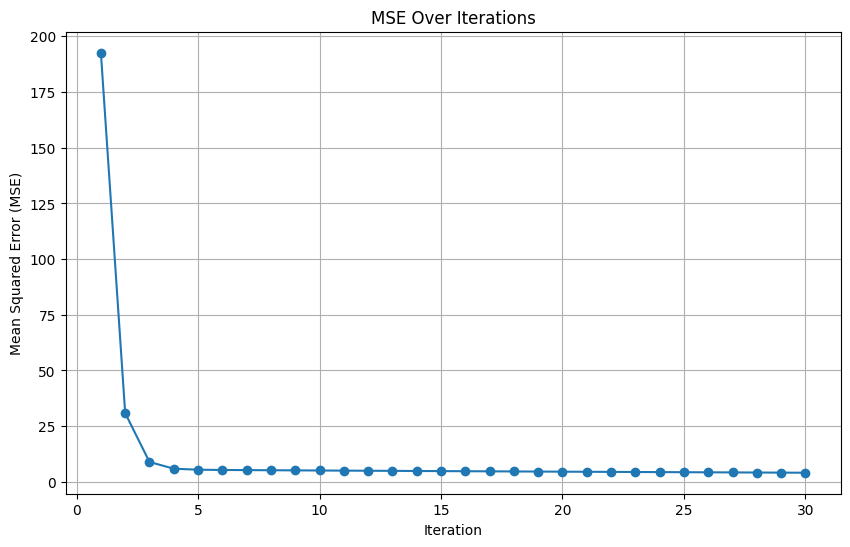

In [39]:
# Initialization of data points and initial parameters
m_true = 4  # True slope
c_true = 5  # True intercept
xs, ys = get_values(m_true, c_true, 15)  # Generate 3 data points

m = 0  # Initial guess for slope
c = 0  # Initial guess for intercept

# Learning rate
learning_rate = 0.01

# Number of iterations
iterations = 30

# List to store MSE values for each iteration
mse_values = []

# Print initial values
print(f"Initial m: {m}, c: {c}")
print(f"Data points (xs): {xs}")
print(f"Data points (ys): {ys}")

# Perform backpropagation over multiple iterations
for i in range(iterations):
    # Step 1: Compute the predicted values based on the current guess
    estimate_ys = calculate_estimates(xs, m, c)
    
    # Step 2: Calculate the gradients
    n = len(xs)
    gradient_m = (-2/n) * sum(xs * (ys - estimate_ys))
    gradient_c = (-2/n) * sum(ys - estimate_ys)
    
    # Step 3: Update the parameters
    m = m - learning_rate * gradient_m
    c = c - learning_rate * gradient_c
    
    # Step 4: Compute the new predicted values
    estimate_ys_new = calculate_estimates(xs, m, c)
    
    # Step 5: Calculate the new MSE
    mse_new = calculate_mse(ys, estimate_ys_new)
    
    # Store the MSE for plotting later
    mse_values.append(mse_new)
    

print(f"m is {m} and c is {c}")
# Step 6: Plot the MSE over iterations
plt.figure(figsize=(10, 6))
plt.plot(range(1, iterations + 1), mse_values, marker='o')
plt.title("MSE Over Iterations")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error (MSE)")
plt.grid(True)
plt.show()


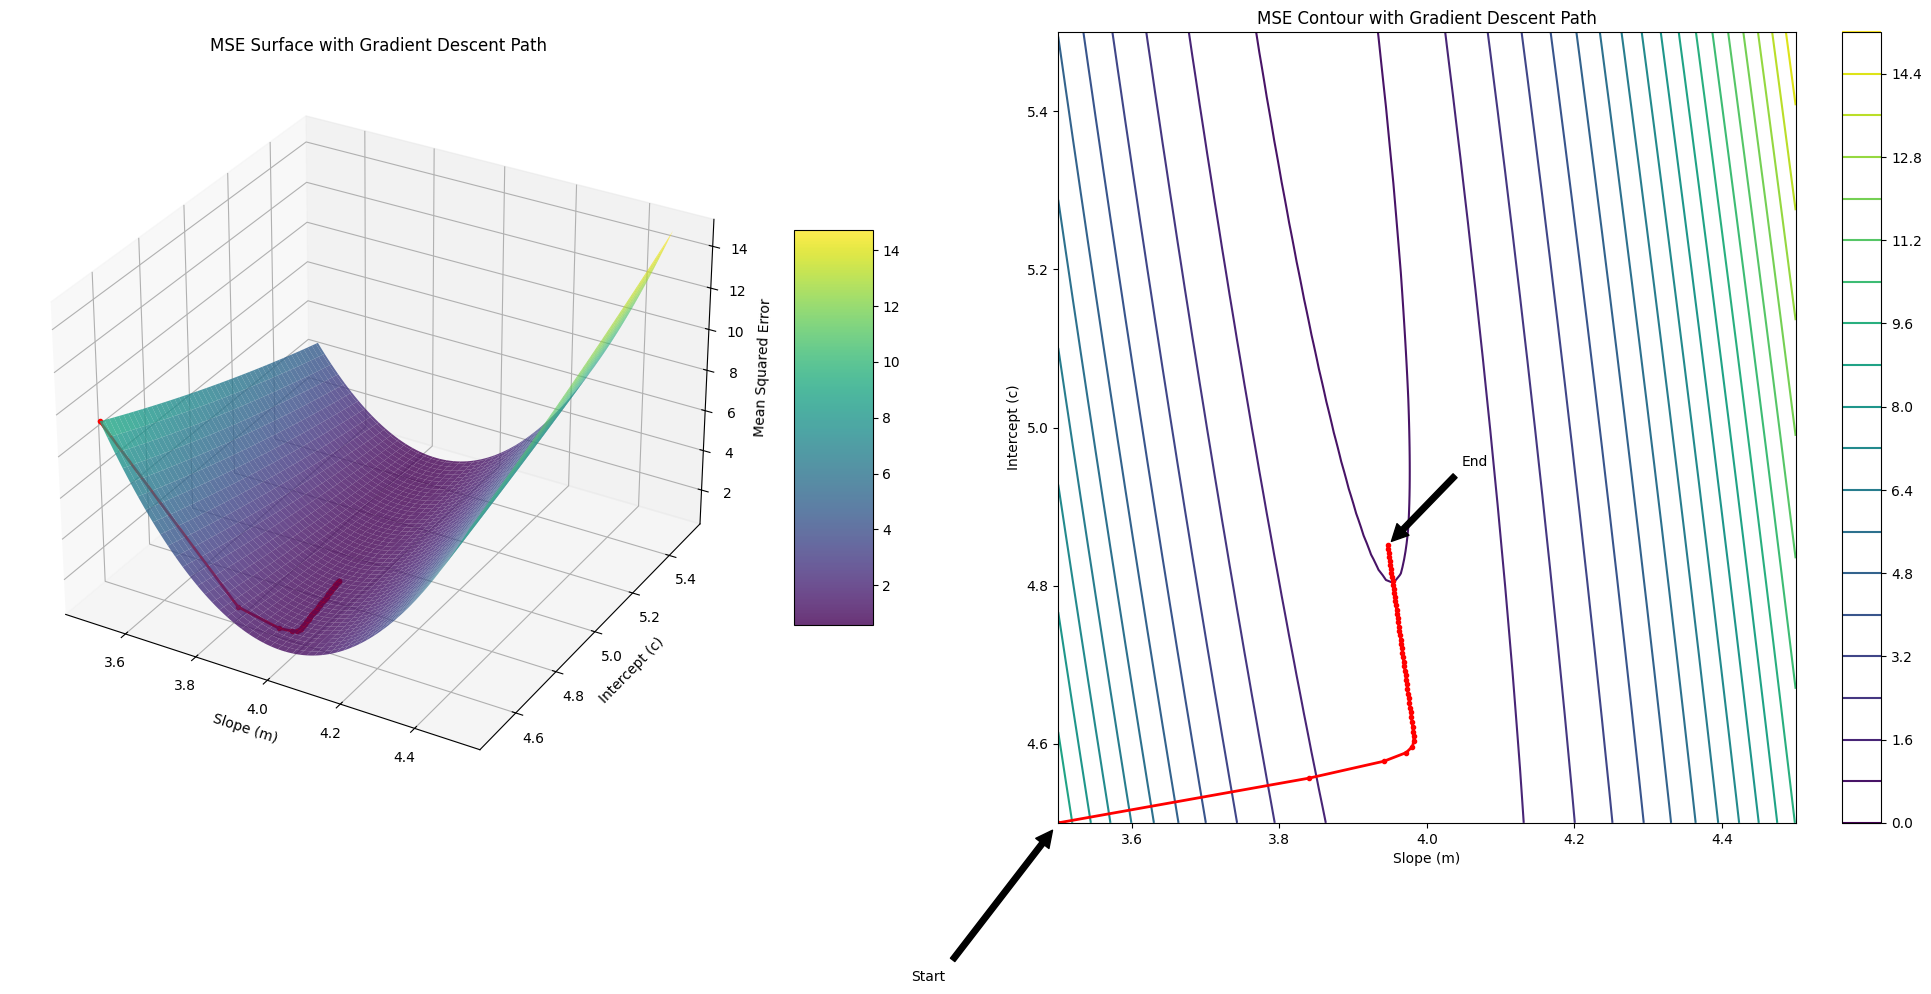

True values: m = 4, c = 5
Final estimated values: m = 3.9468, c = 4.8512
Final MSE: 0.7756


In [61]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Set random seed for reproducibility
np.random.seed(42)

# True parameters
m_true = 4
c_true = 5

# Generate data
xs = np.linspace(0, 10, 20)
ys = m_true * xs + c_true + np.random.normal(0, 1, 20)

# Define ranges for m and c (focused around the true values)
m_values = np.linspace(3.5, 4.5, 100)
c_values = np.linspace(4.5, 5.5, 100)

# Compute MSE for each pair of (m, c)
M, C = np.meshgrid(m_values, c_values)
MSE = np.zeros(M.shape)

for i in range(M.shape[0]):
    for j in range(M.shape[1]):
        y_pred = M[i, j] * xs + C[i, j]
        MSE[i, j] = np.mean((ys - y_pred) ** 2)

# Gradient descent parameters
learning_rate = 0.01
iterations = 50

# Initialize parameters
m = 3.5
c = 4.5

# Lists to store the path of m, c, and corresponding MSE values
m_path = [m]
c_path = [c]
mse_path = [np.mean((ys - (m * xs + c)) ** 2)]

# Perform gradient descent
for _ in range(iterations):
    y_pred = m * xs + c
    error = y_pred - ys
    
    # Compute gradients
    m_gradient = np.mean(2 * error * xs)
    c_gradient = np.mean(2 * error)
    
    # Update parameters
    m -= learning_rate * m_gradient
    c -= learning_rate * c_gradient
    
    # Store the path
    m_path.append(m)
    c_path.append(c)
    mse_path.append(np.mean((ys - (m * xs + c)) ** 2))

# Create the main figure
fig = plt.figure(figsize=(20, 10))

# 3D surface plot
ax1 = fig.add_subplot(121, projection='3d')
surf = ax1.plot_surface(M, C, MSE, cmap='viridis', alpha=0.8)
ax1.set_xlabel('Slope (m)')
ax1.set_ylabel('Intercept (c)')
ax1.set_zlabel('Mean Squared Error')
ax1.set_title('MSE Surface with Gradient Descent Path')

# Plot the gradient descent path
ax1.plot(m_path, c_path, mse_path, color='red', linewidth=2, marker='o', markersize=3)

# Add color bar
fig.colorbar(surf, ax=ax1, shrink=0.5, aspect=5)

# Contour plot
ax2 = fig.add_subplot(122)
contour = ax2.contour(M, C, MSE, levels=20, cmap='viridis')
ax2.set_xlabel('Slope (m)')
ax2.set_ylabel('Intercept (c)')
ax2.set_title('MSE Contour with Gradient Descent Path')

# Plot the gradient descent path on the contour
ax2.plot(m_path, c_path, color='red', linewidth=2, marker='o', markersize=3)

# Add color bar
fig.colorbar(contour, ax=ax2)

# Annotations
ax2.annotate('Start', xy=(m_path[0], c_path[0]), xytext=(m_path[0]-0.2, c_path[0]-0.2),
             arrowprops=dict(facecolor='black', shrink=0.05))
ax2.annotate('End', xy=(m_path[-1], c_path[-1]), xytext=(m_path[-1]+0.1, c_path[-1]+0.1),
             arrowprops=dict(facecolor='black', shrink=0.05))

plt.tight_layout()
plt.show()

# Print final values
print(f"True values: m = {m_true}, c = {c_true}")
print(f"Final estimated values: m = {m_path[-1]:.4f}, c = {c_path[-1]:.4f}")
print(f"Final MSE: {mse_path[-1]:.4f}")